<a href="https://colab.research.google.com/github/cbsobral/ml-fies/blob/main/Module01_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 01 - Models

In this module, we perform the following steps:

1. Load the data from Mod_00 and create sets and targets for train and test datasets;
2. Standardize and encode observations;
3. Run preliminary model;
4. Provide performance measures and visualization. 

### 1 - Load Data

Here, we import the training and testing sets created in Module00_Data. 


In [3]:
import pandas as pd

url_train = "https://drive.google.com/file/d/1IP7jyXkLgD_Ouy5cL6fJk4VUA5qRB2PK/view?usp=sharing"
path_train = "https://drive.google.com/uc?export=download&id="+url_train.split("/")[-2]
train = pd.read_csv(path_train)
train.shape

(351001, 31)

In [4]:
url_test = "https://drive.google.com/file/d/1v4FqKwt7NzG5RM6d9f1y7CLIdKq69jSS/view?usp=sharing"
path_test = "https://drive.google.com/uc?export=download&id="+url_test.split("/")[-2]
test = pd.read_csv(path_test)
test.shape

(87751, 31)

In [5]:
train_set = train.drop("default", axis=1) # drop targets for training set
train_target = train["default"].copy()

In [6]:
test_set = test.drop("default", axis=1) # drop targets for test set
test_target = test["default"].copy()

### 2 - Pipeline

The pipeline contains functions that will be used to transform the dataset. For the numeric attributes, the stardardization is performed by the StandardScaler. For ordinal attributes, variables are encoded by the OrdinalEncoder, and for categorical, theOneHotEncoder. 

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ("num_imputer", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

ord_pipeline = Pipeline([
        ("ord_imputer", SimpleImputer(strategy="most_frequent")),
        ("ord_encoder", OrdinalEncoder()),
    ])

In [12]:
ord_attribs = ["igc","date_contract"] # 2 attributes

num_attribs = ["family_income",   #17
               "personal_income",
               "high_school_endyear",
               "n_sem_course",
               "n_completed_sem",
               "sem_funded",
               "fam_size",
               "income_pc",
               "tuition_current",
               "inc_prop",
               "perc_requested",
               "loan_value_sem",
               "student_resource",
               "loan_value",
               "loan_limit",
               "total_debt",
               "age"]
  

cat_attribs = ["semester_enroll",  #9
               "gender",
               "occupation", 
               "marital_status",
               "ethnicity", 
               "public_hs", 
               "state_course", 
               "degree", 
               "contract_phase"]

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("ord", ord_pipeline, ord_attribs)
        ])

In [14]:
train_prepared = full_pipeline.fit_transform(train_set)
train_prepared[:1]

<1x94 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [15]:
test_prepared = full_pipeline.fit_transform(test_set)
test_prepared[:1]

<1x94 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

### 3 - Classifiers

For the initial runs, we employ 5 methods: logistic regression, decision tree, random forest, linear support vector classification (SVC), and artificial neural networks (ANN). 


In [27]:
%%timeit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(train_prepared, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


1 loop, best of 5: 1min 23s per loop


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
%%timeit
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier()
dtc = dtc.fit(train_prepared, train_target)

CPU times: user 3min 32s, sys: 132 ms, total: 3min 33s
Wall time: 3min 32s


In [ ]:
%%timeit
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_prepared, train_target)

In [ ]:
%%timeit
from sklearn.svm import LinearSVC

svm = LinearSVC(C=1, loss="hinge")
svm.fit(train_prepared, train_target)

In [ ]:
%%timeit
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
ann.fit(train_prepared, train_target.values.ravel())

### 4 - Performance Evaluation

To asses the preliminary results of the classifiers on the test set, we use the AUC. Using cross-validation for the training set, the best result was achieved with the ANN -- AUC of XX%. The best performing models on the test set, in line with the cross-validation scores, were XX and XX. AUC of XX% and XX%, respectively. 

#### Cross-Validation

In [ ]:
cross_logr = (cross_val_score(logr, train_prepared, train_target, cv=2, scoring="roc_auc")).mean()
cross_dtc = (cross_val_score(dtc, train_prepared, train_target, cv=2, scoring="roc_auc")).mean()
cross_rf = (cross_val_score(rf, train_prepared, train_target, cv=2, scoring="roc_auc")).mean()
cross_svm = (cross_val_score(svm, train_prepared, train_target, cv=2, scoring="roc_auc")).mean()
cross_ann = (cross_val_score(ann, train_prepared, train_target, cv=2, scoring="roc_auc")).mean()

In [ ]:
# List with AUC scores for training set
cross_list = [cross_logr, cross_dtc, cross_rf, cross_svm, cross_ann]

# Dataframe 
cross_df = pd.DataFrame({"AUC": cross_list})
cross_df.sort_values(by = "AUC", ascending=False)

#### Test Set

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for test set
pred_logr = logr.predict_proba(test_prepared)
pred_dtc = dtc.predict_proba(test_prepared)
pred_rf = rf.predict_proba(test_prepared)
pred_svm = svm.predict_proba(test_prepared)
pred_ann = ann.predict_proba(test_prepared)

0.7232117555794347 0.6449863805995869


In [ ]:
from sklearn.metrics import roc_auc_score

# AUC score
auc_logr = roc_auc_score(test_target, pred_logr[:,1])
auc_dtc = roc_auc_score(test_target, pred_dtc[:,1])
auc_rf = roc_auc_score(test_target, pred_rf[:,1])
auc_svm = roc_auc_score(test_target, pred_svm[:,1])
auc_ann = roc_auc_score(test_target, pred_ann[:,1])

# List with AUC scores
auc_list = [auc_logr, auc_dtc, auc_rf, auc_svm, auc_ann]

# Dataframe 
auc_df= pd.DataFrame({"AUC": auc_list})
auc_df.sort_values(by = "AUC", ascending=False)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr_logr, tpr_logr, thresh_logr = roc_curve(test_target, pred_logr[:,1], pos_label=1)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(test_target, pred_dtc[:,1], pos_label=1)
fpr_rf, tpr_rf, thresh_rf = roc_curve(test_target, pred_rf[:,1], pos_label=1)
fpr_svm, tpr_svm, thresh_svm = roc_curve(test_target, pred_svm[:,1], pos_label=1)
fpr_ann, tpr_ann, thresh_ann = roc_curve(test_target, pred_ann[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_target))]
p_fpr, p_tpr, _ = roc_curve(test_target, random_probs, pos_label=1)

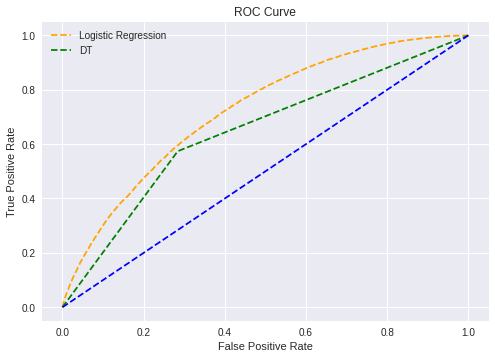

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# plot roc curves
plt.plot(fpr_logr, tpr_logr, linestyle="--",color="purple", label="LR")
plt.plot(fpr_dtc, tpr_dtc, linestyle="--",color="green", label="DT")
plt.plot(fpr_rf, tpr_rf, linestyle="--",color="blue", label="RF")
plt.plot(fpr_rf, tpr_rf, linestyle="--",color="orange", label="SVM")
plt.plot(fpr_svm, tpr_svm, linestyle="--",color="red", label="ANN")
plt.plot(fpr_ann, tpr_ann, linestyle="--", color="black")

# title
plt.title("ROC Curve")
# x label
plt.xlabel("False Positive Rate")
# y label
plt.ylabel("True Positive Rate")

plt.legend(loc="best")
plt.savefig("ROC", dpi = 300)
plt.show();

### X - Feature Importance 

In [ ]:
feat_names = list(train_set.columns)

In [ ]:
rf.feature_importances_
plt.barh(feat_names, rf.feature_importances_)

### X - Save Models

In [ ]:
import joblib

joblib.dump(logr, logr.sav)
joblib.dump(dtc, dtc.sav)
joblib.dump(svm, svm.sav)
joblib.dump(ann, ann.sav)

In [ ]:
import joblib

logr = joblib.load(logr.sav)